 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [49]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import plotly.graph_objects as go

Accuracy of the Model:
0.89
Weight vector:
[[-0.47794431]
 [ 0.30517745]
 [ 0.34148011]]


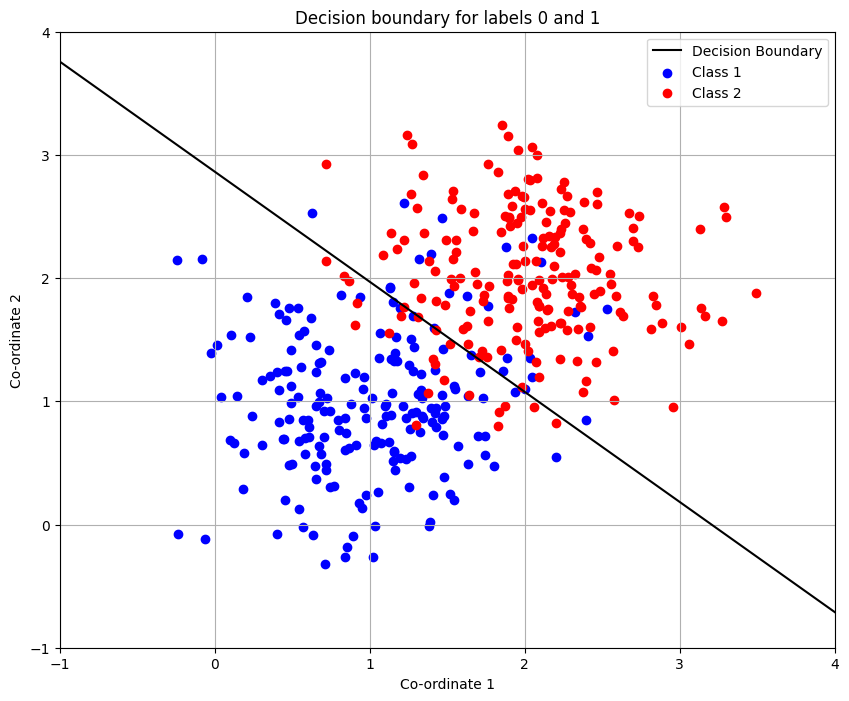

Accuracy of the Model:
0.89
Weight vector:
[[ 1.95588863]
 [-0.61035491]
 [-0.68296023]]


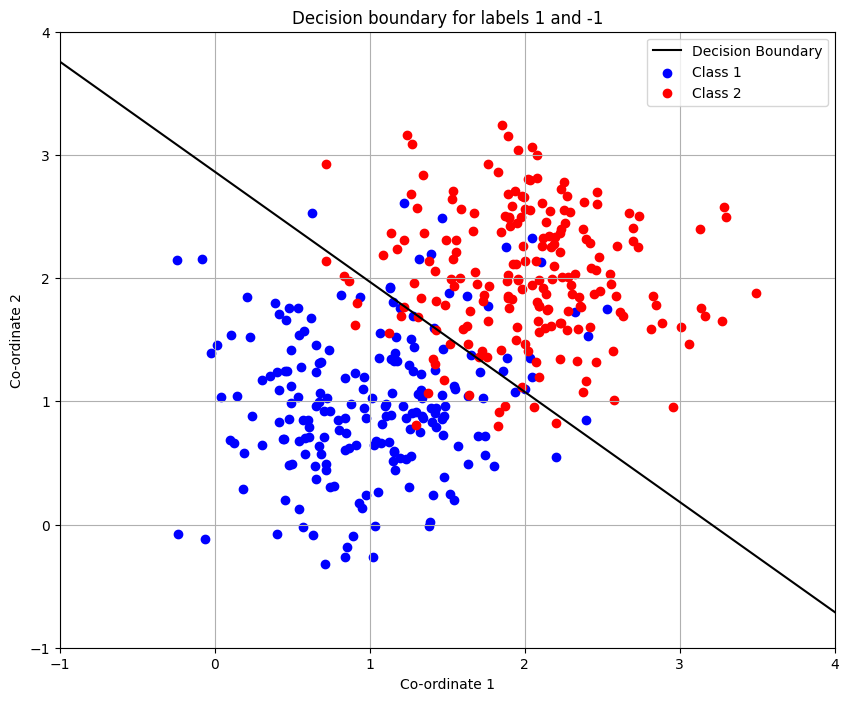

Accuracy of the Model:
0.915
Weight vector:
[[-0.3297559 ]
 [ 0.33819822]
 [ 0.23944038]]


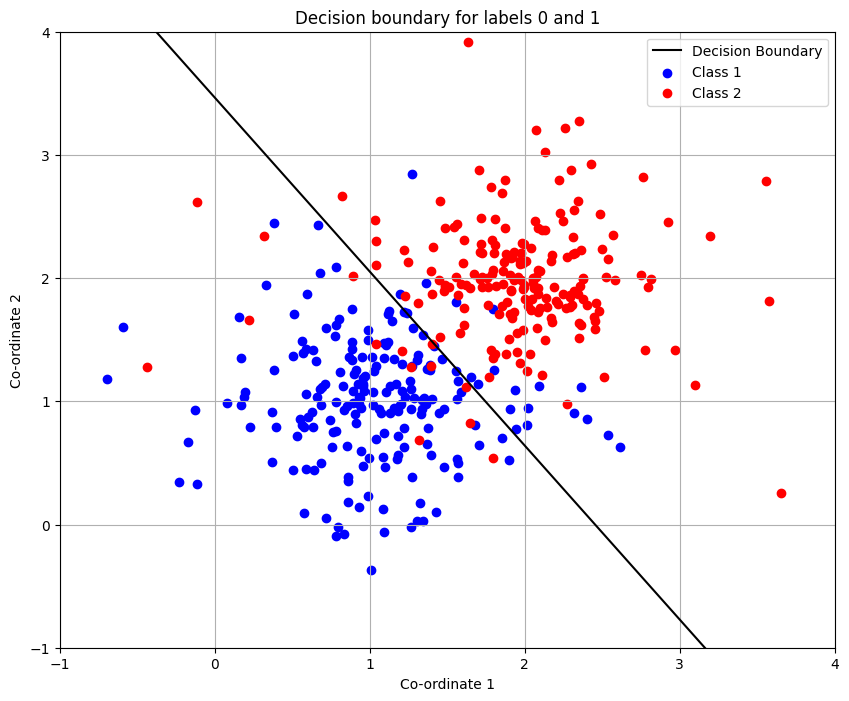

Accuracy of the Model:
0.915
Weight vector:
[[ 1.6595118 ]
 [-0.67639644]
 [-0.47888076]]


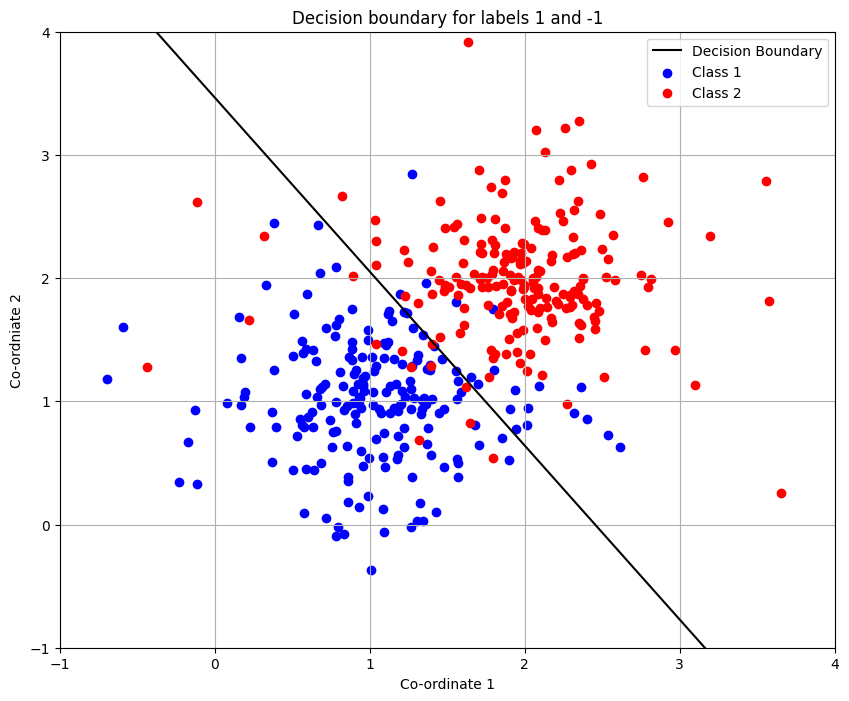

In [50]:
########################################
# Part-1)-a: Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]  # Mean of class1
mean2 = [2, 2]  # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2
# np.random.seed(1849)

# Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))
# Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data to get total testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))

# print(tr_data.shape)


########################################
# Part-1)-b: Find the decision boundary
########################################
# Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels

    x = np.ones((X_train.shape[0], 1))
    x = np.hstack((x, X_train))
    t = np.reshape(Y_train, (Y_train.shape[0], 1))

    # Impliment pseudo inverse solution to get the weight vector

    w_opt = np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), t)

    # Predict the lables of test data using the pseudo inverse solution

    x_test = np.ones((400, 1))
    x_test = np.hstack((x_test, X_test))

    # Return the predicted test labels
    y_pred = np.dot(x_test, w_opt)
    y_pred = (np.sign(y_pred - 0.5) + 1) / 2

    return y_pred, w_opt


# Get the test data predictions
predictions, w_opt = LS_Classify(tr_data, tr_targets, te_data)


##########################################
# Part-1)-c: Evaluate the quality of decision boundary
##########################################
# Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    correct = np.sum(Y_test.ravel() == Y_pred.ravel())
    accuracy = correct / len(Y_test)
    return accuracy




print("Accuracy of the Model:")
print(LS_Classify_Accuracy(te_targets, predictions))

print("Weight vector:")
print(w_opt)

##########################################
# Part-1)-d: Visualize the decision boundary
##########################################


def decision_boundary(x, w_opt):
    return (
        -(w_opt[0] + w_opt[1] * x - 0.5) / w_opt[2]
    )  # The 0.5 because the threshold is at 0.5



plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, decision_boundary(x, w_opt), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Decision boundary for labels 0 and 1")
plt.legend()
plt.grid()
plt.show()


##########################################
# Part-1)-e: Change the target label notation, and repeat the experiments
##########################################

# class1_tr = np.random.multivariate_normal(mean1, cov, 50)
# class2_tr = np.random.multivariate_normal(mean2, cov, 50)
# tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.concatenate((np.ones(50), -np.ones(50)))
# print(tr_targets)
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))

# class1_te = np.random.multivariate_normal(mean1, cov, 200)
# class2_te = np.random.multivariate_normal(mean2, cov, 200)
# te_data = np.vstack((class1_te, class2_te))
te_targets = np.concatenate((np.ones(200), -np.ones(200)))
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))

# predictions_2,w_opt2 = LS_Classify(tr_data, tr_targets, te_data)

# predictions_2 = np.where(predictions_2 > 0.5, 1, -1) # Convert the predictions to -1 and 1


def LS_Classify_2(X_train, Y_train, X_test):

    # Inputs: Training data, Training labels, and Testing data
    # Outputs: Testing labels

    x = np.ones((X_train.shape[0], 1))
    x = np.hstack((x, X_train))
    t = np.reshape(Y_train, (Y_train.shape[0], 1))

    # Impliment pseudo inverse solution to get the weight vector

    w_opt = np.dot(np.dot(np.linalg.pinv(np.dot(x.T, x)), x.T), t)

    # Predict the lables of test data using the pseudo inverse solution

    x_test = np.ones((400, 1))
    x_test = np.hstack((x_test, X_test))

    # Return the predicted test labels
    y_pred = np.dot(x_test, w_opt)
    y_pred = np.sign(y_pred)

    return y_pred, w_opt


predictions_2, w_opt2 = LS_Classify_2(tr_data, tr_targets, te_data)


print("Accuracy of the Model:")
print(LS_Classify_Accuracy(te_targets, predictions_2))
print("Weight vector:")
print(w_opt2)


def decision_boundary_2(x, w_opt):
    return (
        -(w_opt[0] + w_opt[1] * x) / w_opt[2]
    )  # nothing because the threshold is at 0


plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, decision_boundary_2(x, w_opt2), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Decision boundary for labels 1 and -1")
plt.legend()
plt.grid()
plt.show()

##########################################
# Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################

# train data laplacian
class1_tr_lp1 = np.random.laplace(mean1[0], (cov[0][0] / 2) ** 0.5, 50)
class1_tr_lp1 = np.reshape(class1_tr_lp1, (class1_tr_lp1.shape[0], 1))
class1_tr_lp2 = np.random.laplace(mean1[1], (cov[1][1] / 2) ** 0.5, 50)
class1_tr_lp2 = np.reshape(class1_tr_lp2, (class1_tr_lp2.shape[0], 1))
class2_tr_lp1 = np.random.laplace(mean2[0], (cov[0][0] / 2) ** 0.5, 50)
class2_tr_lp1 = np.reshape(class2_tr_lp1, (class2_tr_lp1.shape[0], 1))
class2_tr_lp2 = np.random.laplace(mean2[1], (cov[1][1] / 2) ** 0.5, 50)
class2_tr_lp2 = np.reshape(class2_tr_lp2, (class2_tr_lp2.shape[0], 1))
tr_data_lp1 = np.vstack((class1_tr_lp1, class2_tr_lp1))
tr_data_lp2 = np.vstack((class1_tr_lp2, class2_tr_lp2))
tr_data_lp = np.hstack((tr_data_lp1, tr_data_lp2))
tr_targets_lp = np.concatenate((np.zeros(50), np.ones(50)))
tr_targets_lp = np.reshape(tr_targets_lp, (tr_targets_lp.shape[0], 1))

# test data laplacian
class1_te_lp1 = np.random.laplace(mean1[0], (cov[0][0] / 2) ** 0.5, 200)
class1_te_lp1 = np.reshape(class1_te_lp1, (class1_te_lp1.shape[0], 1))
class1_te_lp2 = np.random.laplace(mean1[1], (cov[1][1] / 2) ** 0.5, 200)
class1_te_lp2 = np.reshape(class1_te_lp2, (class1_te_lp2.shape[0], 1))
class2_te_lp1 = np.random.laplace(mean2[0], (cov[0][0] / 2) ** 0.5, 200)
class2_te_lp1 = np.reshape(class2_te_lp1, (class2_te_lp1.shape[0], 1))
class2_te_lp2 = np.random.laplace(mean2[1], (cov[1][1] / 2) ** 0.5, 200)
class2_te_lp2 = np.reshape(class2_te_lp2, (class2_te_lp2.shape[0], 1))
te_data_lp1 = np.vstack((class1_te_lp1, class2_te_lp1))
te_data_lp2 = np.vstack((class1_te_lp2, class2_te_lp2))
te_data_lp = np.hstack((te_data_lp1, te_data_lp2))
te_targets_lp = np.concatenate((np.zeros(200), np.ones(200)))
te_targets_lp = np.reshape(te_targets_lp, (te_targets_lp.shape[0], 1))


predictions_lp, w_opt_lp = LS_Classify(tr_data_lp, tr_targets_lp, te_data_lp)

print("Accuracy of the Model:")
print(LS_Classify_Accuracy(te_targets_lp, predictions_lp))

print("Weight vector:")
print(w_opt_lp)

plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, decision_boundary(x, w_opt_lp), color="black", label="Decision Boundary")
plt.scatter(class1_te_lp1, class1_te_lp2, color="blue", label="Class 1")
plt.scatter(class2_te_lp1, class2_te_lp2, color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Decision boundary for labels 0 and 1")
plt.legend()
plt.grid()
plt.show()

# train data laplacian
# class1_tr_lp1 = np.random.laplace(mean1[0], (cov[0][0] / 2) ** 0.5, 50)
# class1_tr_lp1 = np.reshape(class1_tr_lp1, (class1_tr_lp1.shape[0], 1))
# class1_tr_lp2 = np.random.laplace(mean1[1], (cov[1][1] / 2) ** 0.5, 50)
# class1_tr_lp2 = np.reshape(class1_tr_lp2, (class1_tr_lp2.shape[0], 1))
# class2_tr_lp1 = np.random.laplace(mean2[0], (cov[0][0] / 2) ** 0.5, 50)
# class2_tr_lp1 = np.reshape(class2_tr_lp1, (class2_tr_lp1.shape[0], 1))
# class2_tr_lp2 = np.random.laplace(mean2[1], (cov[1][1] / 2) ** 0.5, 50)
# class2_tr_lp2 = np.reshape(class2_tr_lp2, (class2_tr_lp2.shape[0], 1))
# tr_data_lp1 = np.vstack((class1_tr_lp1, class2_tr_lp1))
# tr_data_lp2 = np.vstack((class1_tr_lp2, class2_tr_lp2))
# tr_data_lp = np.hstack((tr_data_lp1, tr_data_lp2))
tr_targets_lp = np.concatenate((np.ones(50), -np.ones(50)))
tr_targets_lp = np.reshape(tr_targets_lp, (tr_targets_lp.shape[0], 1))

# test data laplacian
# class1_te_lp1 = np.random.laplace(mean1[0], (cov[0][0] / 2) ** 0.5, 200)
# class1_te_lp1 = np.reshape(class1_te_lp1, (class1_te_lp1.shape[0], 1))
# class1_te_lp2 = np.random.laplace(mean1[1], (cov[1][1] / 2) ** 0.5, 200)
# class1_te_lp2 = np.reshape(class1_te_lp2, (class1_te_lp2.shape[0], 1))
# class2_te_lp1 = np.random.laplace(mean2[0], (cov[0][0] / 2) ** 0.5, 200)
# class2_te_lp1 = np.reshape(class2_te_lp1, (class2_te_lp1.shape[0], 1))
# class2_te_lp2 = np.random.laplace(mean2[1], (cov[1][1] / 2) ** 0.5, 200)
# class2_te_lp2 = np.reshape(class2_te_lp2, (class2_te_lp2.shape[0], 1))
# te_data_lp1 = np.vstack((class1_te_lp1, class2_te_lp1))
# te_data_lp2 = np.vstack((class1_te_lp2, class2_te_lp2))
# te_data_lp = np.hstack((te_data_lp1, te_data_lp2))
te_targets_lp = np.concatenate((np.ones(200), -np.ones(200)))
te_targets_lp = np.reshape(te_targets_lp, (te_targets_lp.shape[0], 1))

predictions_lp_2, w_opt_lp_2 = LS_Classify_2(tr_data_lp, tr_targets_lp, te_data_lp)
print("Accuracy of the Model:")
print(LS_Classify_Accuracy(te_targets_lp, predictions_lp_2))
print("Weight vector:")
print(w_opt_lp_2)


plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, decision_boundary_2(x, w_opt_lp_2), color="black", label="Decision Boundary")
plt.scatter(class1_te_lp1, class1_te_lp2, color="blue", label="Class 1")
plt.scatter(class2_te_lp1, class2_te_lp2, color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordniate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Decision boundary for labels 1 and -1")
plt.legend()
plt.grid()
plt.show()

<b> Report your observations </b>

1. We are using the same generated data but assigning different labels and we dont notice any dispreoancies and they almost have the same accuracy ( since the threshold is adjusted).

2. For both the distributions the decision boundary is a straight line and passes close to the average of class means.

3. The least squares model gives an accuracy of around 0.9 for the given parameters for both the distributions.

4. The weight vectors and decision boundaries are close for both distributions resulting in a similar accuracy.




<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


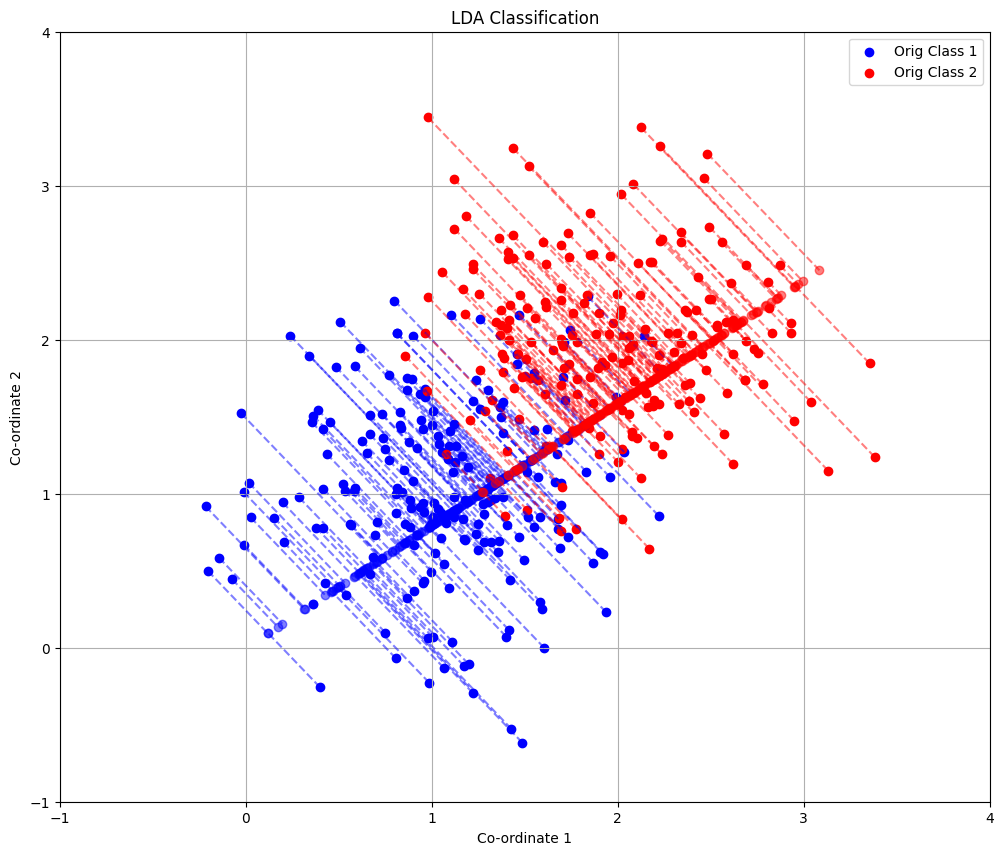

Accuracy with LDA: 90.25


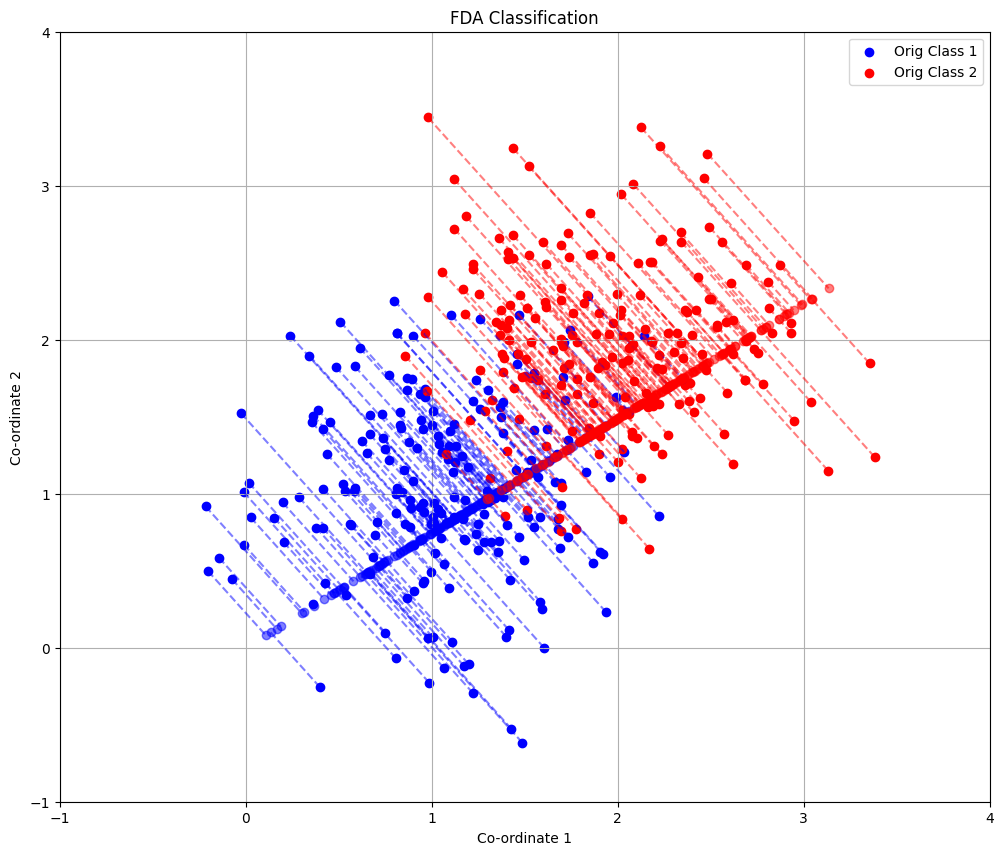

Accuracy with FDA: 90.25


In [51]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

# Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))
# Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data to get total testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))

# print(tr_data.shape)



########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Between class covariance

    #Compute the weight vector
    class1_tr = X_train[Y_train.flatten() == 0]
    class2_tr = X_train[Y_train.flatten() == 1]
    mean1_tr = np.mean(class1_tr, axis=0)
    mean2_tr = np.mean(class2_tr, axis=0)
    w = (mean1_tr - mean2_tr).T

    #Compute the threshold
    projection_1 = np.dot(mean1_tr, w)
    projection_2 = np.dot(mean2_tr, w)
    line_threshold = (projection_1 + projection_2) / 2
    #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
    projects = np.dot(X_test, w) - line_threshold
    projects = np.sign(projects)

    if projection_1 > line_threshold:
        predictions = (1 - projects) / 2
    else:
        predictions = (1 + projects) / 2
    #Return weight vector and the predictions on testing data

    return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)
# print(predictions)

def LDA_project(w, X_test, Y_test):
    #Inputs: weight vector, testing data, and testing labels
    orig_class1 = X_test[Y_test.flatten() == 0]
    orig_class2 = X_test[Y_test.flatten() == 1]

    plt.figure(figsize=(12,10))
    plt.scatter(orig_class1[:, 0], orig_class1[:, 1], color="blue", label="Orig Class 1")
    plt.scatter(orig_class2[:, 0], orig_class2[:, 1], color="red", label="Orig Class 2")

    w = w/np.linalg.norm(w)

    projects = np.dot(X_test, w).reshape(-1, 1)
    project_pts = projects * w.T

    # proj_class1 = project_pts[Y_test.flatten() == 0]
    # proj_class2 = project_pts[Y_test.flatten() == 1]

    for point in orig_class1:
        scalar = np.dot(point, w)
        proj_pt = scalar * w.T
        plt.plot([point[0], proj_pt[0]], [point[1], proj_pt[1]], 'b--', alpha=0.5)
        plt.plot(proj_pt[0], proj_pt[1], 'bo', alpha=0.5)

    for point in orig_class2:
        scalar = np.dot(point, w)
        proj_pt = scalar * w.T
        plt.plot([point[0], proj_pt[0]], [point[1], proj_pt[1]], 'r--', alpha=0.5)
        plt.plot(proj_pt[0], proj_pt[1], 'ro', alpha=0.5)

    plt.xlabel("Co-ordinate 1")
    plt.ylabel("Co-ordinate 2")
    plt.title("LDA Classification")
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.show()




LDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = LS_Classify_Accuracy(te_targets, predictions)
print('Accuracy with LDA:', acc*100)


# ########################################
# #Part-2)-(c)
# ########################################
def FDA_classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Weight vector and predictions

    class1_tr = X_train[Y_train.flatten() == 0]
    class2_tr = X_train[Y_train.flatten() == 1]

    mean1_tr = np.mean(class1_tr, axis=0)
    mean2_tr = np.mean(class2_tr, axis=0)

    S1 = np.dot((class1_tr - mean1_tr).T, (class1_tr - mean1_tr))
    S2 = np.dot((class2_tr - mean2_tr).T, (class2_tr - mean2_tr))
    Sw = S1 + S2  # Total within-class scatter

    #Compute the weight vector
    w = np.dot(np.linalg.inv(Sw), (mean1_tr - mean2_tr).T)

    #Compute the threshold
    proj1 = np.dot(mean1_tr, w)
    proj2 = np.dot(mean2_tr, w)

    line_threshold = (proj1 + proj2) / 2


    #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision

    projects = np.dot(X_test, w) - line_threshold
    projects = np.sign(projects)


    if proj1 > line_threshold:
        predictions = (1 - projects) / 2
    else:
        predictions = (1 + projects) / 2


    #Return weight vector and the predictions on testing data

    return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)


def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

    orig_class1 = X_test[Y_test.flatten() == 0]
    orig_class2 = X_test[Y_test.flatten() == 1]

    w = w/np.linalg.norm(w)

  #Project the test data onto 1-dimensional space
    projects = np.dot(X_test, w).reshape(-1, 1)
    project_pts = projects * w.T

    proj_class1 = project_pts[Y_test.flatten() == 0]
    proj_class2 = project_pts[Y_test.flatten() == 1]


  #Plot the projections
    plt.figure(figsize=(12, 10))
    plt.scatter(orig_class1[:, 0], orig_class1[:, 1], color="blue", label="Orig Class 1")
    plt.scatter(orig_class2[:, 0], orig_class2[:, 1], color="red", label="Orig Class 2")

    # Draw projection lines and points for Class 1
    for point in orig_class1:
        scalar = np.dot(point, w)
        proj_pt = scalar * w.T
        plt.plot([point[0], proj_pt[0]], [point[1], proj_pt[1]], 'b--', alpha=0.5)
        plt.plot(proj_pt[0], proj_pt[1], 'bo', alpha=0.5)

    # Draw projection lines and points for Class 2
    for point in orig_class2:
        scalar = np.dot(point, w)
        proj_pt = scalar * w.T
        plt.plot([point[0], proj_pt[0]], [point[1], proj_pt[1]], 'r--', alpha=0.5)
        plt.plot(proj_pt[0], proj_pt[1], 'ro', alpha=0.5)

    plt.xlabel("Co-ordinate 1")
    plt.ylabel("Co-ordinate 2")
    plt.title("FDA Classification")
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()


FDA_project(w, te_data, te_targets)
#Compute and print the accuracy

acc1 = LS_Classify_Accuracy(te_targets, predictions)
# print(te_targets)
# print(predictions)
print('Accuracy with FDA:', acc1*100)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix

    class1_tr = X_train[Y_train.flatten() == 0]
    class2_tr = X_train[Y_train.flatten() == 1]

    mean1_tr = np.mean(class1_tr, axis=0)
    mean2_tr = np.mean(class2_tr, axis=0)
    meane = np.mean(X_train, axis=0)

    S1 = np.dot((class1_tr - mean1_tr).T, (class1_tr - mean1_tr))
    S2 = np.dot((class2_tr - mean2_tr).T, (class2_tr - mean2_tr))
    Sw = S1 + S2  # Total within-class scatter

    n_1 = class1_tr.shape[0]
    n_2 = class2_tr.shape[0]

    Sb = n_1 * np.outer((mean1_tr - meane), (mean1_tr - meane)) + n_2 * np.outer((mean2_tr - meane), (mean2_tr - meane))



    evals , evecs = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))

    sor_inds = np.argsort(evals)[::-1]
    evals = evals[sor_inds]
    evecs = evecs[:, sor_inds]

    w = evecs[:, :k]

  #Compute and return the projection matrix
    return w

W = FDA_project_K(tr_data, tr_targets, te_data,k= 1)




<b> Report your observations </b>

1. Since we are using the same dataset , FDA (in general) performs slightly better than LDA since LDA uses only between-class covariance but FDA uses both between-class covariance and within-class covariance.

2. The projection would be along the line joining the two class means.

3. In this case the covariances are equal so LDA and FDA would produce virtually identical results.

4. LDA's performance isnt bad since the class means are well-seperated.

5. As we can see the projected 1D data has two overlapping distributions with a clear gap between their means..


<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


Accuracy of the Perceptron Model:
0.925


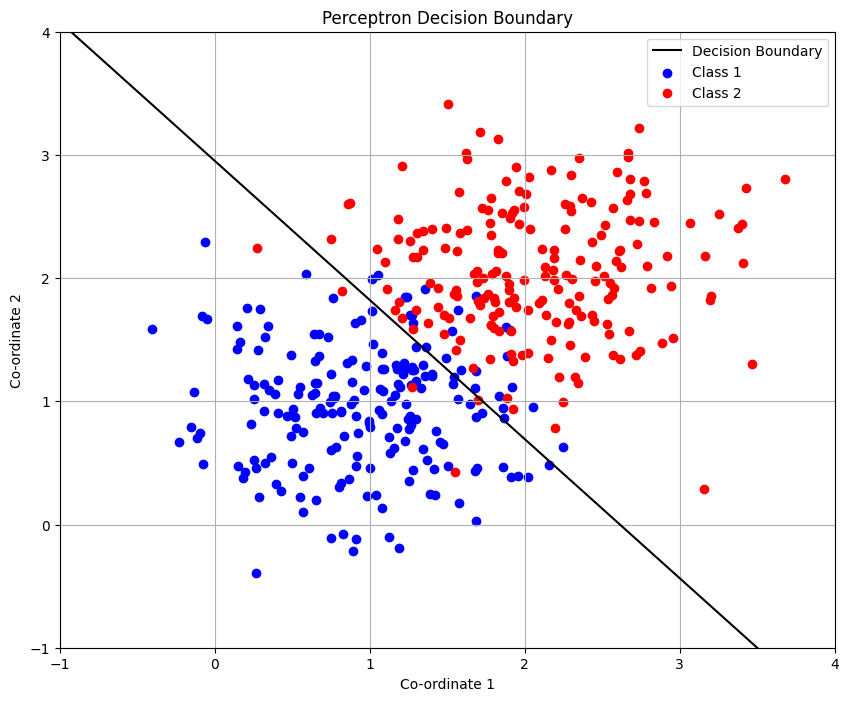

Accuracy of the Least squares Model:
0.9375


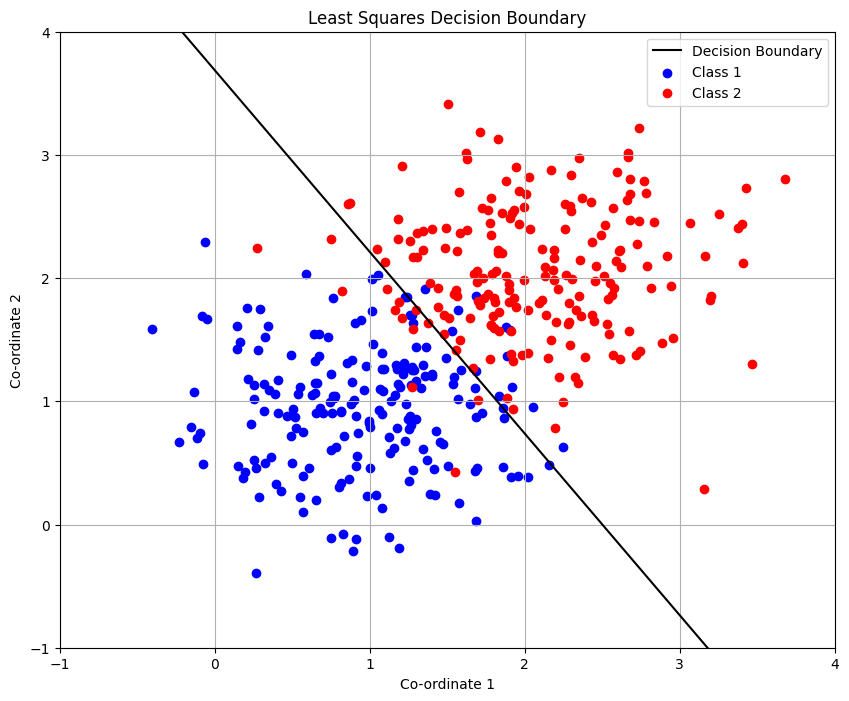

The dataset with introduced outliers:


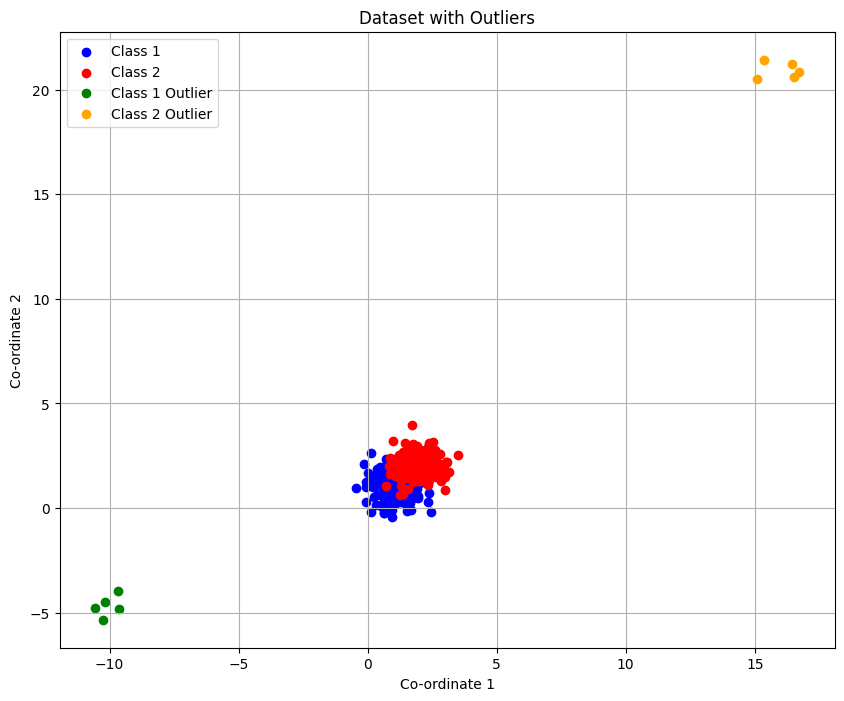

Accuracy of the Perceptron Model with outliers:
0.8825


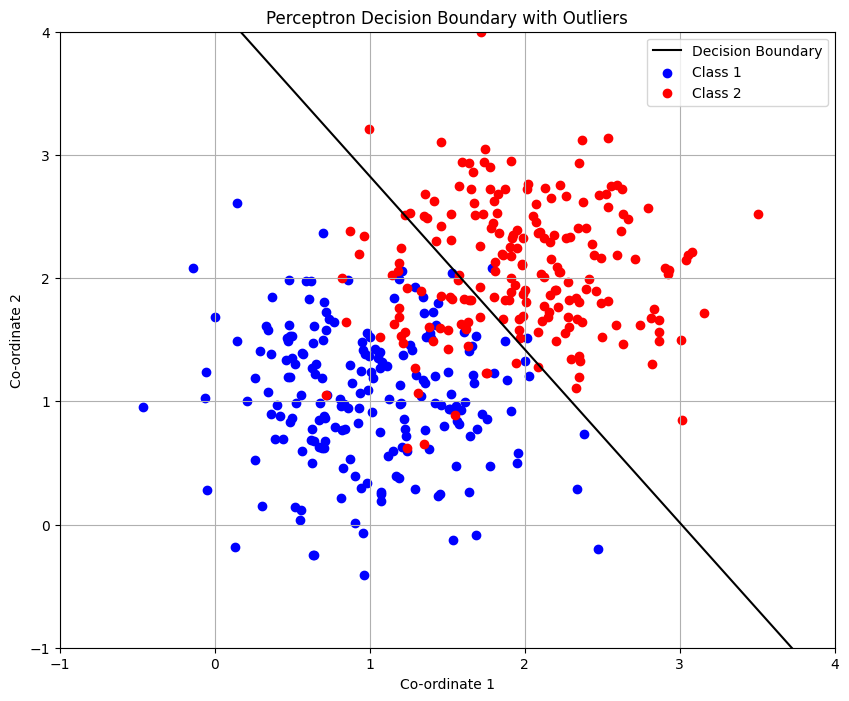

Accuracy of the Least squares Model with outliers:
0.7475


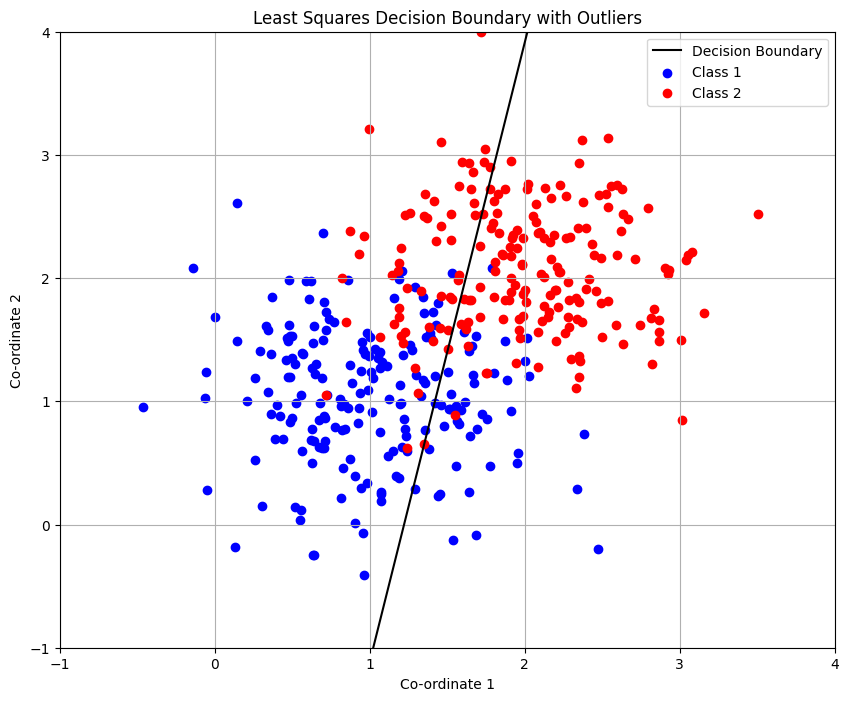

Accuracy of the Perceptron Model for XOR data:
0.425


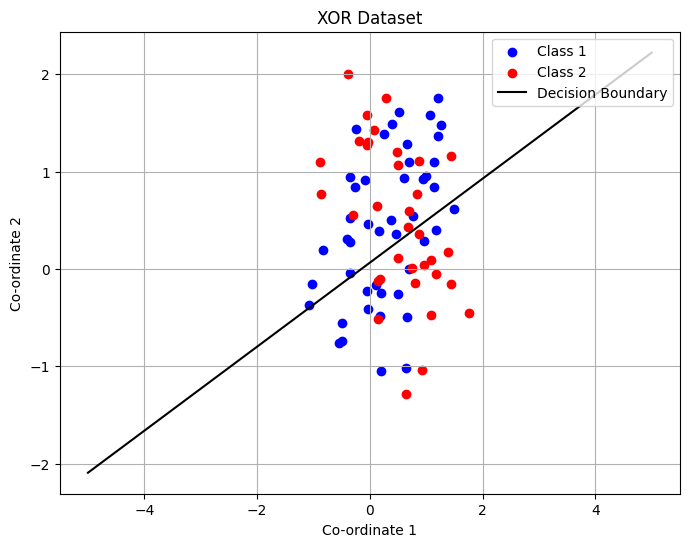

In [52]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

# Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.ones(50), -np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))
# Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data to get total testing data
te_targets = np.concatenate((np.ones(200), -np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))


########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000    #Number of epochs
    X = np.hstack( (np.ones((X_train.shape[0], 1)), X_train)) #Data. Append ones to the training data to take care of the bias
    w =  np.zeros((X.shape[1], 1))  #Initialize the weight vector
    for epoch in range(0,epochs,1):
        #Compute the predictions
        preds = np.dot(X, w)
        preds = np.sign(preds)
        preds = np.where(preds >= 0, 1, -1)

        #Compute the error
        diff = (Y_train - preds)/2

        #Update the weight vector
        w = w + np.dot(X.T, diff)

    #Compute the test data predicitions using the final weight vector

    X_test_fin = np.hstack( (np.ones((X_test.shape[0], 1)), X_test))
    preds_test = np.dot(X_test_fin, w)
    preds_test = np.sign(preds_test)
    preds_test = np.where(preds_test >= 0, 1, -1)

    predictions = preds_test

    #Return the test data predictions and the final weight vector
    return predictions, w

predictions, w_perceptron = Perceptron(tr_data, tr_targets, te_data)
# print(predictions)


##########################################
#Plot the decision boundary using perceptron
##########################################

def boundary_perc(x,w):
    return -(w[0] + w[1]*x)/w[2] # because the threshold is at 0

print("Accuracy of the Perceptron Model:")
print(LS_Classify_Accuracy(te_targets, predictions))

plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, boundary_perc(x, w_perceptron), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid()
plt.show()


##########################################
#Plot the decision boundary using least squares
##########################################

predictions_ls, w_ls = LS_Classify_2(tr_data, tr_targets, te_data)
predictions_ls = predictions_ls

def boundary_ls(x,w):
    return -(w[0] + w[1]*x )/w[2] # because the threshold is at 0


print("Accuracy of the Least squares Model:")
print(LS_Classify_Accuracy(te_targets, predictions_ls))
plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, boundary_ls(x, w_ls), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Least Squares Decision Boundary")
plt.legend()
plt.grid()
plt.show()

##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2
mean1_out = [-10,-5] # 5 outliers in class 1  in training data
mean2_out = [16, 21] # 5 outliers in class 2  in training data

# Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
class1_tr_out = np.random.multivariate_normal(mean1_out, cov, 5)  # Class1 training data
class2_tr_out = np.random.multivariate_normal(mean2_out, cov, 5)  # Class2 training data
class1_tr = np.vstack((class1_tr, class1_tr_out))
class2_tr = np.vstack((class2_tr, class2_tr_out))
tr_data = np.vstack( (class1_tr, class2_tr))  # Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.ones(55), -np.ones(55)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))
# Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data to get total testing data
te_targets = np.concatenate((np.ones(200), -np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))


predictions_perceptron , w_perceptron = Perceptron(tr_data, tr_targets, te_data)
predictions_ls, w_ls = LS_Classify_2(tr_data, tr_targets, te_data)

print("The dataset with introduced outliers:")

plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.scatter(class1_tr_out[:, 0], class1_tr_out[:, 1], color="green", label="Class 1 Outlier")
plt.scatter(class2_tr_out[:, 0], class2_tr_out[:, 1], color="orange", label="Class 2 Outlier")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.title("Dataset with Outliers")
plt.legend()
plt.grid()
plt.show()

print("Accuracy of the Perceptron Model with outliers:")
print(LS_Classify_Accuracy(te_targets, predictions_perceptron))

plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, boundary_perc(x, w_perceptron), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
# plt.scatter(class1_tr_out[:, 0], class1_tr_out[:, 1], color="green", label="Class 1 Outlier")
# plt.scatter(class2_tr_out[:, 0], class2_tr_out[:, 1], color="orange", label="Class 2 Outlier")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Perceptron Decision Boundary with Outliers")
plt.legend()
plt.grid()
plt.show()

print("Accuracy of the Least squares Model with outliers:")
print(LS_Classify_Accuracy(te_targets, predictions_ls))
plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.plot(x, boundary_ls(x, w_ls), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
# plt.scatter(class1_tr_out[:, 0], class1_tr_out[:, 1], color="green", label="Class 1 Outlier")
# plt.scatter(class2_tr_out[:, 0], class2_tr_out[:, 1], color="orange", label="Class 2 Outlier")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Least Squares Decision Boundary with Outliers")
plt.legend()
plt.grid()
plt.show()


##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0,0]     #Mean of Gaussian1
class1_mean2 = [1,1]     #Mean of Gaussian3
class2_mean1 = [0,1]     #Mean of Gaussian2
class2_mean2 = [1,0]     #Mean of Gaussian4
cov = [[0.3,0],[0,0.3]]  #Covariance matrix. Same covariance for class1 and class2

#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 50)  # Class1 data1
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 50)  # Class1 data2
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 50)  # Class2 data1
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 50)  # Class2 data2
#Obtain 2-class dataset

tr_data = np.vstack( (class1_data1,class1_data2,class2_data1 ,class2_data2))  # Combine class1 data1 and class2 data1 to get total training data
tr_targets = np.concatenate((np.ones(120),-np.ones(120)))  # Class labels. Assign the value "1" to class1 and the value "-1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))

#Create train test splits

indices = np.arange(tr_data.shape[0])
np.random.shuffle(indices)

train_indices = indices[:int(tr_data.shape[0] * 0.6)]
test_indices = indices[int(tr_data.shape[0] * 0.6):]
tr_data_fin = tr_data[train_indices]
tr_targets_fin = tr_targets[train_indices]
te_data_fin = tr_data[test_indices]
te_targets_fin = tr_targets[test_indices]

class1_te_fin = np.empty((0, 2))
class2_te_fin = np.empty((0, 2))

for i in range(te_data_fin.shape[0]):
    if te_targets_fin[i] == 1:
        class1_te_fin = np.vstack((class1_te_fin, te_data_fin[i]))
    else:
        class2_te_fin = np.vstack((class2_te_fin, te_data_fin[i]))


#Classify this dataset using perceptron algorithm
predictions_perc , w_perc = Perceptron(tr_data_fin,tr_targets_fin,te_data_fin)

#Plot the decision boundary

print("Accuracy of the Perceptron Model for XOR data:")
print(LS_Classify_Accuracy(te_targets_fin.flatten(), predictions_perc.flatten()))

# print(len(class1_te_fin))
# print(len(class2_te_fin))

plt.figure(figsize=(8,6))
x = np.linspace(-5, 5, 100)
plt.scatter(class1_te_fin[:, 0], class1_te_fin[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te_fin[:, 0], class2_te_fin[:, 1], color="red", label="Class 2")
plt.plot(x, boundary_perc(x, w_perc), color="black", label="Decision Boundary")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
# plt.xlim(-1, 4)
# plt.ylim(-10, 10)
plt.title("XOR Dataset")
plt.legend(loc = 'upper right')
plt.grid()
plt.show()



<b> Report your observations </b>

1. In the first case (data without outliers) Perceptron model and Least squares model produce similar solution(a line close to perpendicular to the line joing the means). But at times Least squares model has the upper hand over Perceptron model.

2. But when we introduce outliers into the data Perceptron model is less affected(since it only updates when mis - classifications occur) . Whereas the Least Squares model would tilt/shift toward the outliers. So the decision boundary is more stable and maintain better classification in this scenario.

3. Rarely Least squares model may have a better performance (not due to the decision boundary but the spread) than the Perceptron Model.

4. The Perceptron model would fail to classify points properly in the XOR data (since XOR data is not linearly seperable). The decision boundary results in poor results with accuracies oscillating between 0.5 and 0.7.


<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




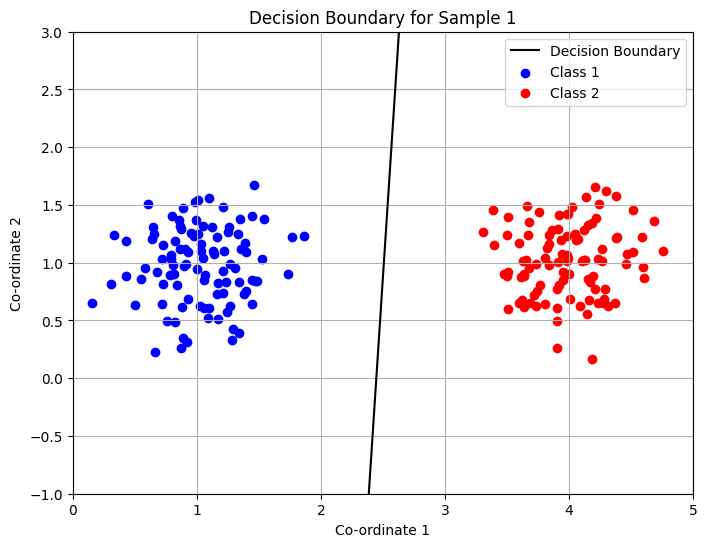

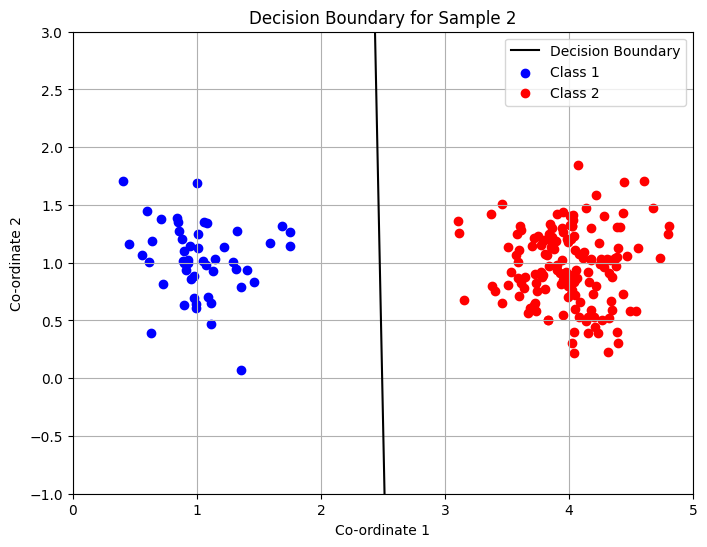

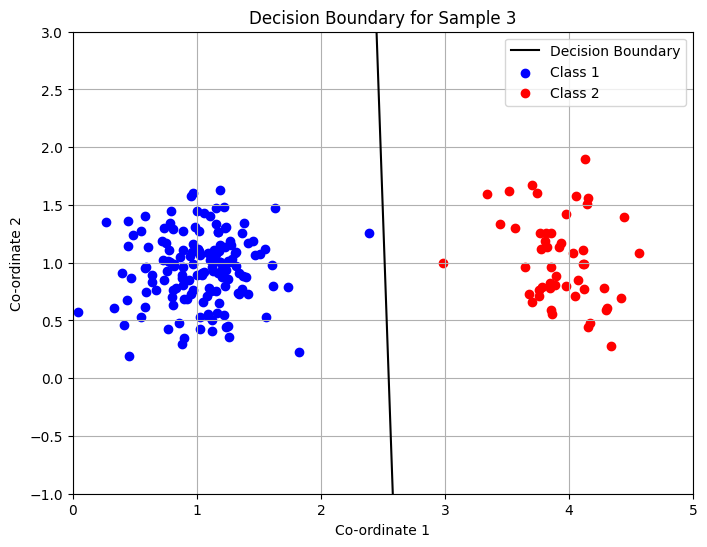

In [53]:
##########################################
#Part-4a)-0: Data Generation
##########################################
m1 = [1 ,1]
m2 = [4 ,1]
cov = [[0.1,0],[0,0.1]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_samp1 = np.random.multivariate_normal(m1, cov, 100)  # Class1 training data
class2_samp1 = np.random.multivariate_normal(m2, cov, 100)  # Class2 training data
tr_data1 = np.vstack((class1_samp1, class2_samp1))  # Combine class1 training and class2 training data to get total training data
tr_targets1 = np.concatenate((np.ones(100), -np.ones(100)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets1 = np.reshape(tr_targets1, (tr_targets1.shape[0], 1))

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_samp2 = np.random.multivariate_normal(m1, cov, 50)  # Class1 training data
class2_samp2 = np.random.multivariate_normal(m2, cov, 150)  # Class2 training data
tr_data2 = np.vstack((class1_samp2, class2_samp2))  # Combine class1 training and class2 training data to get total training data
tr_targets2 = np.concatenate((np.ones(50), -np.ones(150)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets2 = np.reshape(tr_targets2, (tr_targets2.shape[0], 1))

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_samp3 = np.random.multivariate_normal(m1, cov, 150)  # Class1 training data
class2_samp3 = np.random.multivariate_normal(m2, cov, 50)  # Class2 training data
tr_data3 = np.vstack((class1_samp3, class2_samp3))  # Combine class1 training and class2 training data to get total training data
tr_targets3 = np.concatenate((np.ones(150), -np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets3 = np.reshape(tr_targets3, (tr_targets3.shape[0], 1))



##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w

    non_zero_count =0
    for i in range(len(Y_train)):
        if Y_train[i] == 1:
            non_zero_count += 1
    p_c1 = non_zero_count/len(Y_train)
    p_c2 = 1. - p_c1

    class1_data = X_train[Y_train.flatten() == 1]
    class2_data = X_train[Y_train.flatten() == -1]

    mean1 = np.mean(class1_data, axis=0)
    mean2 = np.mean(class2_data, axis=0)

    cov1 = np.dot((class1_data - mean1).T , (class1_data-mean1))
    cov2 = np.dot((class2_data - mean2).T, (class2_data- mean2))

    cov = (cov1 + cov2) / (class1_data.shape[0] + class2_data.shape[0])

    coinv = np.linalg.inv(cov)

    w = np.dot(np.linalg.inv(cov), (mean1 - mean2).T)
    w0 = -0.5 * np.dot(np.dot(mean1.T, coinv), mean1) + 0.5 * np.dot(np.dot(mean2.T, coinv), mean2) + np.log(p_c1/p_c2)

    return np.array([w0]+list(w))

#Plot the decision regions

def boundary(x, w):
    return -(w[0] + w[1]*x)/w[2]


def boundary_fig(class1,class2,heading,tr_data, tr_targets):

    w_sam = decisionBoundary(tr_data, tr_targets)
    x= np.linspace(0, 5, 100)
    plt.figure(figsize=(8,6))
    plt.plot(x, boundary(x, w_sam), color="black", label="Decision Boundary")
    plt.scatter(class1[:, 0], class1[:, 1], color="blue", label="Class 1")
    plt.scatter(class2[:, 0], class2[:, 1], color="red", label="Class 2")
    plt.xlabel("Co-ordinate 1")
    plt.ylabel("Co-ordinate 2")
    plt.xlim(0, 5)
    plt.ylim(-1, 3)
    plt.title(heading)
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.show()


boundary_fig(class1_samp1, class2_samp1, "Decision Boundary for Sample 1", tr_data1, tr_targets1)
boundary_fig(class1_samp2, class2_samp2, "Decision Boundary for Sample 2", tr_data2, tr_targets2)
boundary_fig(class1_samp3, class2_samp3, "Decision Boundary for Sample 3", tr_data3, tr_targets3)


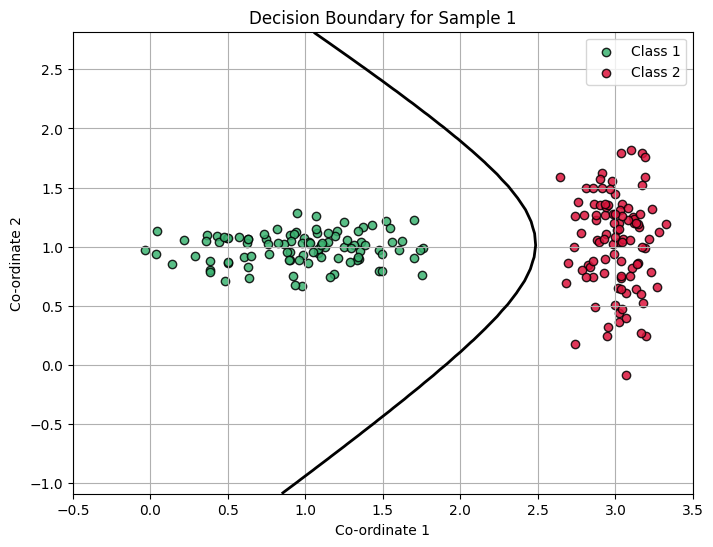

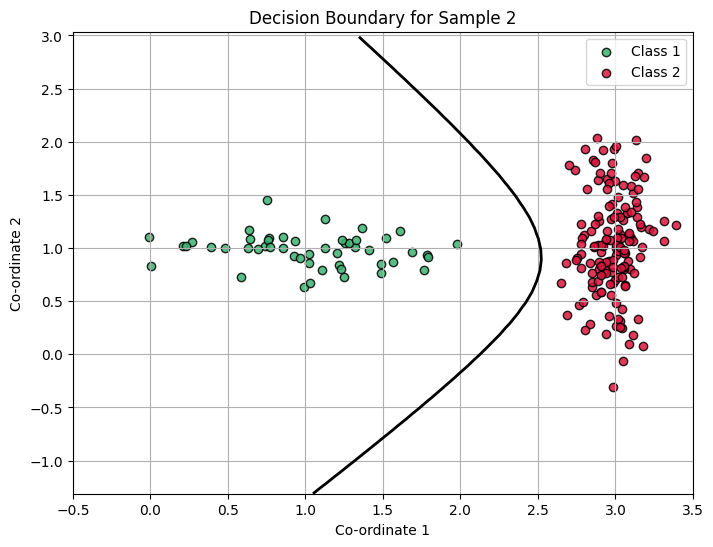

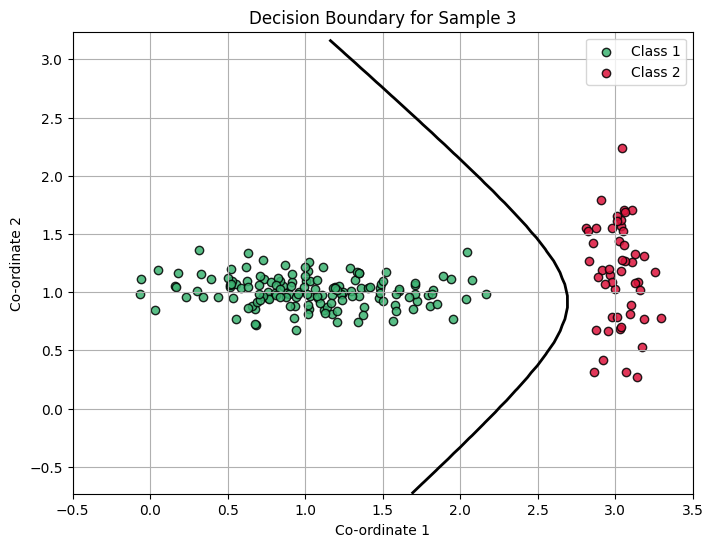

In [54]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = [1,1]
m2 = [3,1]
cov1 = [[0.2,0],[0,0.02]]
cov2 = [[0.02,0],[0,0.2]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_samp1 = np.random.multivariate_normal(m1, cov1, 100)  # Class1 training data
class2_samp1 = np.random.multivariate_normal(m2, cov2, 100)  # Class2 training data
tr_data1 = np.vstack((class1_samp1, class2_samp1))  # Combine class1 training and class2 training data to get total training data
tr_targets1 = np.concatenate((np.ones(100), -np.ones(100)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets1 = np.reshape(tr_targets1,  (tr_targets1.shape[0], 1))


#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_samp2 = np.random.multivariate_normal(m1, cov1, 50)  # Class1 training data
class2_samp2 = np.random.multivariate_normal(m2, cov2, 150)  # Class2 training data
tr_data2 = np.vstack((class1_samp2, class2_samp2))  # Combine class1 training and class2 training data to get total training data
tr_targets2 = np.concatenate((np.ones(50), -np.ones(150)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets2 = np.reshape(tr_targets2,  (tr_targets2.shape[0], 1))


#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_samp3 = np.random.multivariate_normal(m1, cov1, 150)  # Class1 training data
class2_samp3 = np.random.multivariate_normal(m2, cov2, 50)  # Class2 training data
tr_data3 = np.vstack((class1_samp3, class2_samp3))  # Combine class1 training and class2 training data to get total training data
tr_targets3 = np.concatenate((np.ones(150), -np.ones(50)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets3 = np.reshape(tr_targets3,  (tr_targets3.shape[0], 1))



##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train, X_test):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w

    non_zero_count =0
    for i in range(len(Y_train)):
        if Y_train[i] == 1:
            non_zero_count += 1

    p_c1 = non_zero_count/len(Y_train)
    p_c2 = 1. - p_c1

    class1_data = X_train[Y_train.flatten() == 1]
    class2_data = X_train[Y_train.flatten() == -1]

    mean1 = np.mean(class1_data, axis=0)
    mean2 = np.mean(class2_data, axis=0)

    cov1 = np.cov(class1_data.T)
    cov2 = np.cov(class2_data.T)

    incov1 = np.linalg.inv(cov1)
    incov2 = np.linalg.inv(cov2)

    dcov1 = np.linalg.det(cov1)
    dcov2 = np.linalg.det(cov2)

    #Compute predictions on test data

    predictions = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        pt = X_test[i]
        d1 = pt - mean1
        loglike1 = -0.5 * np.dot(np.dot(d1.T, incov1), d1) - 0.5 * np.log(dcov1) + np.log(p_c1)
        d2 = pt - mean2
        loglike2 = -0.5 * np.dot(np.dot(d2.T, incov2), d2) - 0.5 * np.log(dcov2) + np.log(p_c2)

        predictions[i] = loglike1 - loglike2

    return predictions

#Plot the decision regions

def boundary_plot(X_train,Y_train,hading):

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    x_d,y_d =  np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    grid = np.c_[x_d.ravel(),y_d.ravel()]

    predictions = decisionBoundary(X_train, Y_train, grid)
    predictions = predictions.reshape(x_d.shape)

    class1_pts = X_train[Y_train.flatten() == 1]
    class2_pts = X_train[Y_train.flatten() == -1]

    # misclassified_mask = predictions.flatten() != Y_train.flatten()
    # misclassified_pts = X_train[misclassified_mask]

    plt.figure(figsize=(8,6))
    plt.contour(x_d, y_d, predictions, levels=[0], colors='black', linewidths=2)
    plt.scatter(class1_pts[:, 0], class1_pts[:, 1],color="mediumseagreen", marker='o',edgecolor='k', alpha=0.85, label="Class 1")
    plt.scatter(class2_pts[:, 0], class2_pts[:, 1],color="crimson", marker='o',edgecolor='k', alpha=0.85, label="Class 2")
    # plt.scatter(misclassified_pts[:, 0], misclassified_pts[:, 1], color="green", label="Misclassified Points")
    plt.xlabel("Co-ordinate 1")
    plt.ylabel("Co-ordinate 2")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlim(-0.5,3.5)
    plt.title(hading)
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()

boundary_plot(tr_data1, tr_targets1, "Decision Boundary for Sample 1")
boundary_plot(tr_data2, tr_targets2, "Decision Boundary for Sample 2")
boundary_plot(tr_data3, tr_targets3, "Decision Boundary for Sample 3")



<b> Report your observations </b>

1. For generality I chose to consider the sample means rather than population means.

2. In the first case,

   For equal prior probabilities the decision boundary which is a straight line passes through the mid point of the line joining both the means. Since the classes are well seperated the Classification accuracy is high.

   For unequal prior probabilites the decision boundary shifts toward the class with lower prior probability (still a straight line).

3. In the second case,

   For equal prior probabilities the decision boundary like a hyoerbola due to differrence in covariances. Because of the way the classes are distributed across different axes they are not linearly seperable.

   For unequal prior probabilites the curve will retain its shape but shifts toward the class with lower prior probability.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




 Accuracy with Logistic Regression: 92.5 




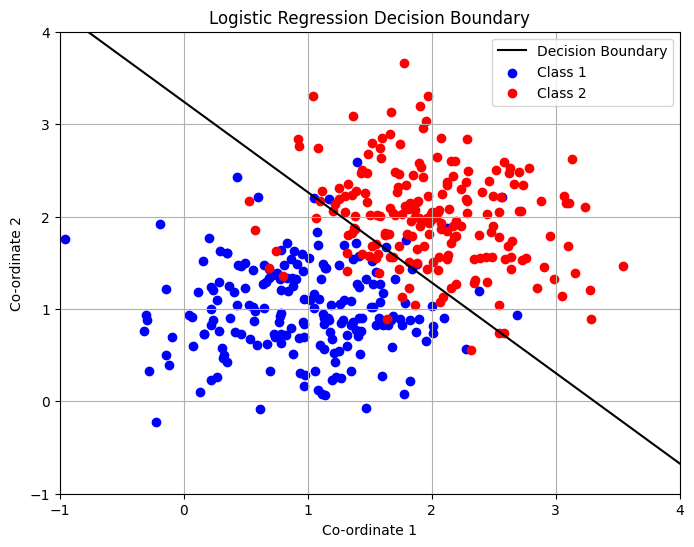

Accuracy of the Least squares Model:
92.75


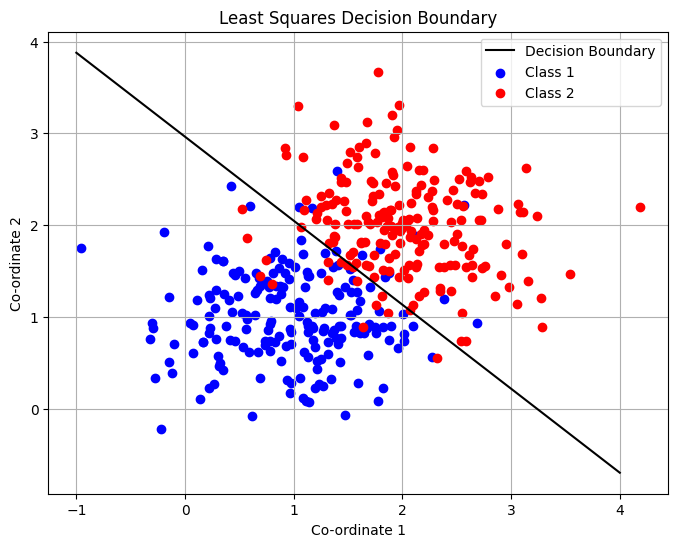

The dataset with introduced outliers:


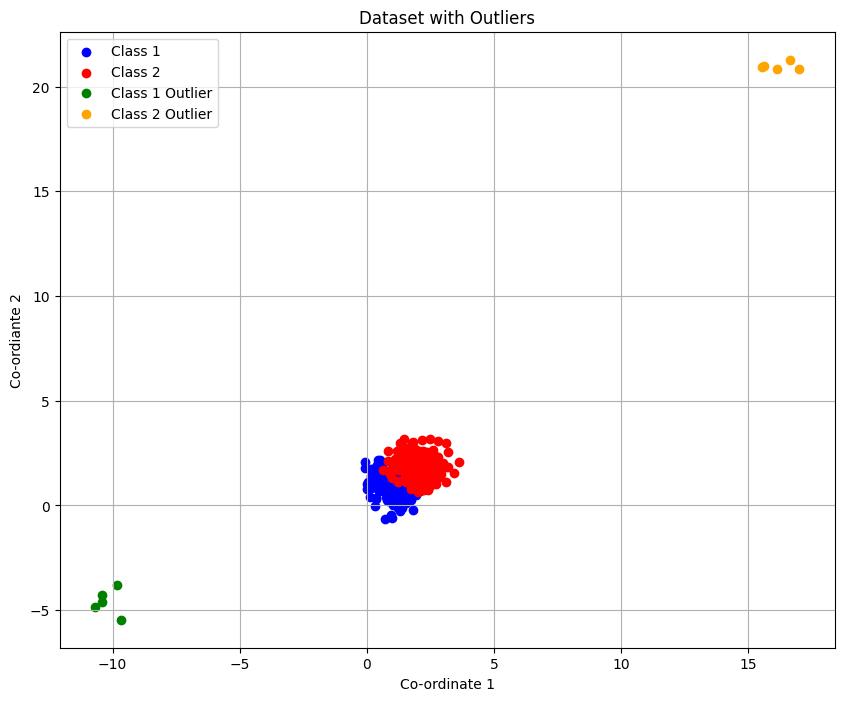

Accuracy of the Logistic Regression Model with outliers:
90.75


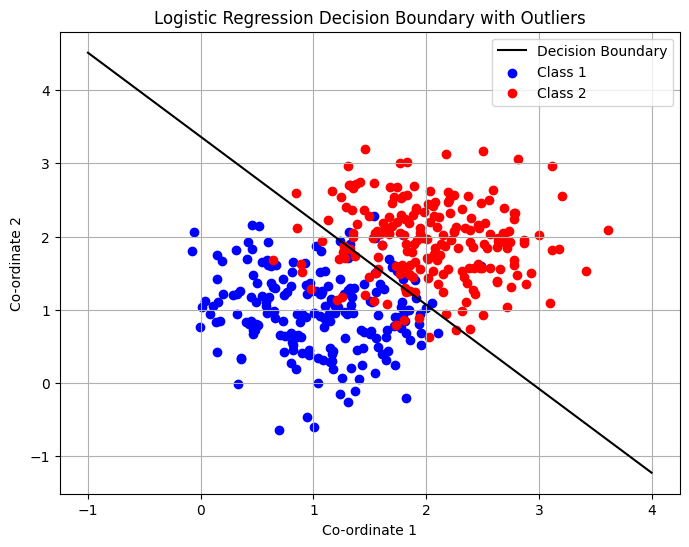

Accuracy of the Least squares Model with outliers:
74.5


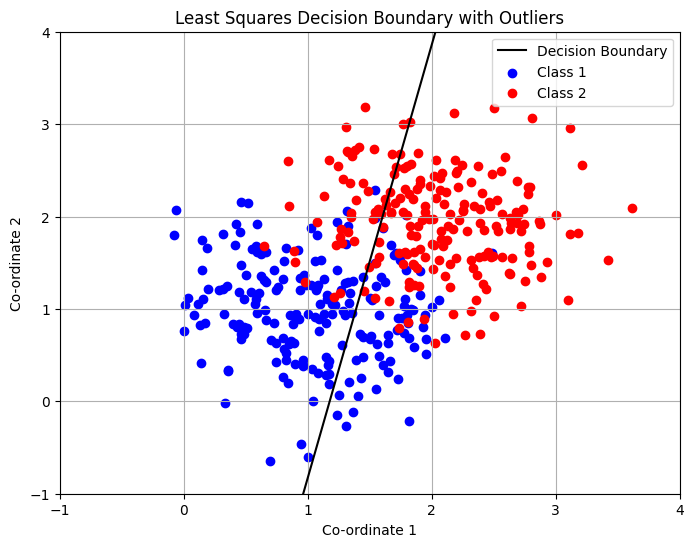

In [55]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 =  [1,1]          #Mean of class1
mean2 =  [2,2]          #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr =  np.random.multivariate_normal(mean1,cov,50)           #Class1 training data
class2_tr =  np.random.multivariate_normal(mean2,cov,50)           #Class2 training data
tr_data =  np.vstack((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(50),np.ones(50)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))

#Generate testing data.
class1_te =  np.random.multivariate_normal(mean1,cov,200)            #Class1 testing data
class2_te =  np.random.multivariate_normal(mean2,cov,200)            #Class2 testing data
te_data =   np.vstack((class1_te,class2_te))            #Combine class1 testing and class2 testing data to get total testing data
te_targets =  np.concatenate((np.zeros(200),np.ones(200)))          #Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 100 #max number of ierations for parameter update
  threshold = 0.5 #threshold for classification
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))    #Data. Append ones to the training data to take care of the bias
  w =  np.zeros((X.shape[1], 1))  #Initialize the weight vector

  for iter in range(0,max_iter,1):
    #Predictions on X. Sigmoid(w^T.x)
    preds =  sigmoid(np.dot(X, w))
  #Difference between preds and Y_train
    error =  preds - Y_train

#Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate

    diag_eles = (preds * (1 - preds)).flatten()
    diag_R = np.diag(diag_eles)
    Hessian = np.dot(X.T, np.dot(diag_R, X))
    gradient = np.dot(X.T, error)

    try:
        diff = np.dot(np.linalg.inv(Hessian), gradient)
    except np.linalg.LinAlgError:
        diff = np.dot(np.linalg.inv(Hessian + 1e-4*np.eye(Hessian.shape[0])), gradient)
    w = w - diff

    #Update the weight vector
#Test data predictions
  test_X =  np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds =  sigmoid(np.dot(test_X, w))

#Compare the predictions with 0, to output the decision
  test_preds = (np.sign(test_preds - threshold) + 1)/2

  #Return the predicted test labels
  return test_preds , w

Y_pred , w = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  acc = np.mean(Y_test == Y_pred)
  #Compute and return the accuracy
  return acc*100

acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')

##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################

def boundary_logistic(x, w):
    return -(w[1]*x + w[0] - 0.5)/w[2]

x = np.linspace(-1, 4, 100)

plt.figure(figsize=(8,6))
plt.plot(x, boundary_logistic(x, w), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid()
plt.show()


Y_ls , w_ls = LS_Classify(tr_data, tr_targets, te_data)
def boundary_ls_(x,w):
    return -(w[0] + w[1]*x - 0.5)/w[2]

acc_ls1 = LS_Classify_Accuracy(te_targets, Y_ls)
acc_ls1 = acc_ls1 * 100
print("Accuracy of the Least squares Model:")
print(acc_ls1)

x = np.linspace(-1, 4, 100)
plt.figure(figsize=(8,6))
plt.plot(x, boundary_ls_(x, w_ls), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
# plt.xlim(-1, 4)
# plt.ylim(-1, 4)
plt.title("Least Squares Decision Boundary")
plt.legend()
plt.grid()
plt.show()

##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2
mean1_out = [-10,-5] # 5 outliers in class 1  in training data
mean2_out = [16, 21] # 5 outliers in class 2  in training data
# mean_out = [120,120]

# Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
class1_tr_out = np.random.multivariate_normal(mean1_out, cov, 5)  # Class1 training data
class2_tr_out = np.random.multivariate_normal(mean2_out, cov, 5)  # Class2 training data
class1_tr = np.vstack((class1_tr, class1_tr_out))
class2_tr = np.vstack((class2_tr, class2_tr_out))
tr_data = np.vstack((class1_tr, class2_tr))  # Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(55), np.ones(55)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
tr_targets = np.reshape(tr_targets, (tr_targets.shape[0], 1))
# Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))  # Combine class1 testing and class2 testing data to get total testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets = np.reshape(te_targets, (te_targets.shape[0], 1))


print("The dataset with introduced outliers:")

plt.figure(figsize=(10,8))
x = np.linspace(-1, 4, 100)
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
plt.scatter(class1_tr_out[:, 0], class1_tr_out[:, 1], color="green", label="Class 1 Outlier")
plt.scatter(class2_tr_out[:, 0], class2_tr_out[:, 1], color="orange", label="Class 2 Outlier")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordiante 2")
plt.title("Dataset with Outliers")
plt.legend()
plt.grid()
plt.show()

Y_pred_out , w_opt_out = Logistic_Regression(tr_data, tr_targets, te_data)

print("Accuracy of the Logistic Regression Model with outliers:")
print(LR_Accuracy(te_targets, Y_pred_out))

x = np.linspace(-1, 4, 100)
plt.figure(figsize=(8,6))
plt.plot(x, boundary_logistic(x, w_opt_out), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
# plt.scatter(class1_tr_out[:, 0], class1_tr_out[:, 1], color="green", label="Class 1 Outlier")
# plt.scatter(class2_tr_out[:, 0], class2_tr_out[:, 1], color="orange", label="Class 2 Outlier")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
# plt.xlim(-1, 4)
# plt.ylim(-1, 4)
plt.title("Logistic Regression Decision Boundary with Outliers")
plt.legend()
plt.grid()
plt.show()

predictions_ls , w_ls = LS_Classify(tr_data, tr_targets, te_data)

def boundary_ls_2(x,w):
    return -(w[0] + w[1]*x -0.5 )/w[2] # because the threshold is at 0

acc_ls2 = LS_Classify_Accuracy(te_targets, predictions_ls)
acc_ls2 = acc_ls2 * 100
print("Accuracy of the Least squares Model with outliers:")
print(acc_ls2)

x = np.linspace(-1, 4, 100)
plt.figure(figsize=(8,6))
plt.plot(x, boundary_ls_2(x, w_ls), color="black", label="Decision Boundary")
plt.scatter(class1_te[:, 0], class1_te[:, 1], color="blue", label="Class 1")
plt.scatter(class2_te[:, 0], class2_te[:, 1], color="red", label="Class 2")
# plt.scatter(class1_tr_out[:, 0], class1_tr_out[:, 1], color="green", label="Class 1 Outlier")
# plt.scatter(class2_tr_out[:, 0], class2_tr_out[:, 1], color="orange", label="Class 2 Outlier")
plt.xlabel("Co-ordinate 1")
plt.ylabel("Co-ordinate 2")
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title("Least Squares Decision Boundary with Outliers")
plt.legend()
plt.grid()
plt.show()





<b> Report your observations </b>

1. Logistic regression model was able to find a linear decision boundarybetween the classes.

2. Logistic regression is more stable to outliers because it focuses on maximizing the likelihood rather thanminimizing squared error which Least squares model does.

3. So wihout outliers both Logistic Regression and Least squares produce similar boundaries.

4. Logistic regression model'sboundary would be more focused on seperating the clusters.


<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


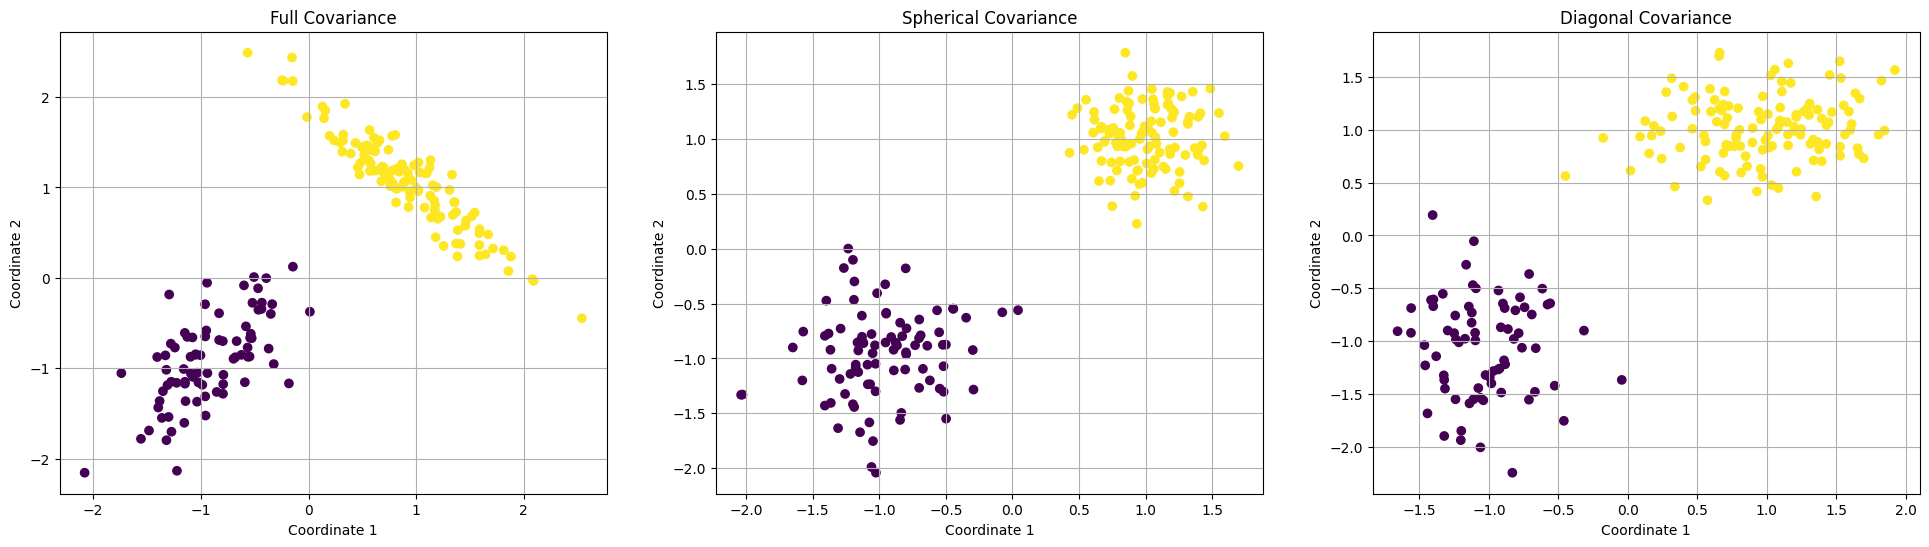

In [56]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions

    choices = np.random.multinomial(1, pi, size=N).argmax(axis=1)
    non_zero_count = 0

    for i in range(len(choices)):
        if choices[i] == 1:
            non_zero_count += 1

    N1 = non_zero_count
    N2 = N - N1

    data1 = np.random.multivariate_normal(np.reshape(mu[0],(2,)),sigma[0],N1)
    data2 = np.random.multivariate_normal(np.reshape(mu[1],(2,)),sigma[1],N2)
    data = np.vstack((data1, data2))
    labels = np.concatenate((np.zeros(N1), np.ones(N2)))

    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = np.array([-1.0, -1.0])   #Mean vector of component1 in GMM
mu1 = np.reshape(mu1, (mu1.shape[0], 1))
sig1 = [[0.15, 0.1], [0.1, 0.25]]  #Full covariance matrix of component1 in GMM
mu2 = np.array([1, 1])   #Mean vector of component2 in GMM
mu2 = np.reshape(mu2, (mu2.shape[0], 1))
sig2 = [[0.3, -0.25], [-0.25, 0.25]]  #Full covariance matrix of component2 in GMM
pi = [0.6, 0.4]    #Prior probabilities

n_points = 200 #Number of points

# Spherical covariances
sig1_s = [[0.2, 0], [0, 0.2]]
sig2_s = [[0.1, 0], [0, 0.1]]
# Diagonal covariances
sig1_d = [[0.1, 0], [0, 0.2]]
sig2_d = [[0.2, 0], [0, 0.1]]

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(24,6))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].set_title('Full Covariance')
ax[0].scatter(data_full[:, 0], data_full[:, 1], c = labels_full, cmap='viridis')

ax[0].set_xlabel("Coordinate 1")
ax[0].set_ylabel("Coordinate 2")
ax[0].grid()
# ax[0].legend(loc = 'upper right')

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].set_title('Spherical Covariance')
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c = labels_sp, cmap='viridis')

ax[1].set_xlabel("Coordinate 1")
ax[1].set_ylabel("Coordinate 2")
ax[1].grid()
# ax[1].legend(loc = 'upper right')

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].set_title('Diagonal Covariance')
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c = labels_dg, cmap='viridis')
ax[2].set_xlabel("Coordinate 1")
ax[2].set_ylabel("Coordinate 2")
ax[2].grid()
# ax[2].legend(loc = 'upper right')


plt.show()


In [96]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
  #Inputs: data, parameters of GMM model
  #Outputs: likelihood

  data1_likelihood = multivariate_normal.pdf(data, mean=mu[0], cov=sigma[0])
  data2_likelihood = multivariate_normal.pdf( data,mean=mu[1], cov=sigma[1])
  lhood = np.vstack((data1_likelihood, data2_likelihood)).T

  pi = np.array(pi).reshape(-1, 1)

  likelihoods = np.dot(lhood, pi)
  log_likelihood = np.log(likelihoods)
  loglihood_sum = np.sum(log_likelihood)

  return loglihood_sum



############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
    N = data.shape[0]
    K = len(pi)
    gamma = np.zeros((N, K))

    for k in range(K):
        gamma[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])

    gamma_sum = np.sum(gamma, axis=1).reshape(-1, 1)
    gamma = gamma / gamma_sum
    return gamma

############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model
  N_components  = np.sum(gamma, axis=0) #Number of components in GMM
  N = np.sum(N_components) #Number of data points
  # pi = N_components/N #Prior probabilities

  #Update mu
  mu = np.dot(gamma.T, data)/N_components.reshape(-1,1)
  mu = np.reshape(mu, (mu.shape[0], mu.shape[1]))

  #Update sigma
  sigma = []
  for k in range(len(N_components)):
    muk = mu[k]
    data_diff = data - muk
    gamma_diag = np.diag(gamma[:, k])
    sigmak = np.dot(data_diff.T, np.dot(gamma_diag, data_diff))/N_components[k]
    sigma.append(sigmak)

  sigma = np.array(sigma)

  #Update pi

  pi = N_components/N
  pi = np.reshape(pi, (pi.shape[0], 1))

  #Return the parameters of GMM model
  return pi, mu, sigma

#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma,gamma,heading):

  class_1 = np.empty((0, data.shape[1]))
  class_2 = np.empty((0, data.shape[1]))

  for i in range(len(data)):
      if gamma[i, 0] > gamma[i, 1]:
          class_1 = np.vstack((class_1, data[i]))
      else:
          class_2 = np.vstack((class_2, data[i]))

  plt.figure(figsize=(8, 6))
  plt.scatter(class_1[:, 0], class_1[:, 1], color="blue", label="Cluster 1", alpha=0.6)
  plt.scatter(class_2[:, 0], class_2[:, 1], color="red", label="Cluster 2", alpha=0.6)

  x = np.linspace(-3, 3, 100)
  y = np.linspace(-3, 3, 100)
  X, Y = np.meshgrid(x, y)
  grid = np.stack([X.ravel(), Y.ravel()]).T

  for i in range(len(pi)):
      # Define parameters for the multivariate Gaussian distribution
      mean = mu[i]
      cov = sigma[i]

      # Compute PDF values for each grid point
      pdf_values = np.array([multivariate_normal.pdf(point, mean, cov) for point in grid])
      pdf_values = pdf_values.reshape(X.shape)

      # Plot contour for the current component
      contour = plt.contour(X, Y, pdf_values, levels=10)

  plt.xlabel("Co-ordinate 1")
  plt.ylabel("Co-ordinate 2")
  # plt.xlim(-1, 4)
  # plt.ylim(-1, 4)
  plt.title(heading)
  # plt.scatter(mu[:, 0], mu[:, 1], color="green", marker='x', label="Means")
  plt.legend()
  plt.grid(True)
  plt.legend(loc = 'upper right')



  plt.show()



############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data = data_full    #data to run EM-algorithm
labels = labels_full  #labels
N =  200      #number of input examples
D =  2      #data dimension
M =  2      #no.of components in GMM

#random intialization of pi
alpha = np.random.uniform(0.1, 1.0, size=2)
pi = alpha / np.sum(alpha)

# random intialization of pi
mu1, mu2 = data[np.random.choice(len(data), size=2, replace=False)]
# random  intialization of sigma
sigma1 = np.diag(np.random.uniform(0.1, 2.0, size=2))  #Initialize the covariance matrices
sigma2 = np.diag(np.random.uniform(0.1, 2.0, size=2))

sigma = [sigma1, sigma2]  #Initialize the covariance matrices
mu = [mu1, mu2]  #Initialize the mean vectors

likelihoods_fig = []  #List to store the likelihoods

nsteps = 20  #Number of steps to run EM algorithm

print("Parameters:")
print("pi: [%.4f, %.4f]" % (pi[0], pi[1]))
print("mu:")
for i in range(len(mu)):
    print("  mu%d: [%.4f, %.4f]" % (i+1, mu[i][0], mu[i][1]))
print("sigma:")
for i in range(len(sigma)):
    print("  sigma%d: [[%.4f, %.4f], [%.4f, %.4f]]" %
          (i+1, sigma[i][0,0], sigma[i][0,1], sigma[i][1,0], sigma[i][1,1]))


for index in range(0,nsteps,1):

  print("Iteration: ", index)

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
  likelihoods_fig.append(ll)
  # print("Log-likelihood: ", +str(ll))
  print("Log-likelihood: ", str(ll))

  #Plot the contours
  gamma = expectation(data, pi, mu, sigma)
  plot_contours(data, labels, pi, mu, sigma,gamma,'GMM contours')

  #Expectation step


  #Maximization step
  pi, mu, sigma = maximization(data, gamma)


print("Convergence of likelihood over iterations")

iterations = list(range(nsteps))

fig1 = go.Figure()


fig1.add_trace(go.Scatter(
    x=iterations,
    y=likelihoods_fig,
    mode='lines+markers',
    name='EM Log-Likelihood',
    line=dict(color='black', width=2),
    marker=dict(symbol='square', size=8, color='white', line=dict(color='black', width=1.5))
))


fig1.update_layout(
    title='Full Covariance : Convergence of Log-Likelihood over Iterations',
    xaxis=dict(
        title='Number of Iterations',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    yaxis=dict(
        title='Log Likelihood',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    plot_bgcolor='white',
    showlegend=False,
    width=1200,
    height=800,
    margin=dict(l=80, r=40, t=40, b=80)
)

# fig1.show()




Output hidden; open in https://colab.research.google.com to view.

In [64]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################

data = data_full    #data to run EM-algorithm
labels = labels_full  #labels
N = 200       #number of input examples
D = 2       #data dimension
M = 2       #no.of components in GMM

#random intialization of pi
alpha = np.random.uniform(0.1, 1.0, size=2)
pi = alpha / np.sum(alpha)

# random intialization of pi
mu1, mu2 = data_full[np.random.choice(len(data_full), size=2, replace=False)]
# random  intialization of sigma
sigma1 = np.diag(np.random.uniform(0.1, 2.0, size=2))  #Initialize the covariance matrices
sigma2 = np.diag(np.random.uniform(0.1, 2.0, size=2))

sigma = [sigma1, sigma2]  #Initialize the covariance matrices
mu = [mu1, mu2]  #Initialize the mean vectors

nsteps = 30  #Number of steps to run EM algorithm
likelihoods_fig = []

print("Parameters:")
print("pi: [%.4f, %.4f]" % (pi[0], pi[1]))
print("mu:")
for i in range(len(mu)):
    print("  mu%d: [%.4f, %.4f]" % (i+1, mu[i][0], mu[i][1]))
print("sigma:")
for i in range(len(sigma)):
    print("  sigma%d: [[%.4f, %.4f], [%.4f, %.4f]]" %
          (i+1, sigma[i][0,0], sigma[i][0,1], sigma[i][1,0], sigma[i][1,1]))

for index in range(0,nsteps,1):

  print("Iteration Number:" + str(index))

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
  print("Current Likelihood: " + str(ll))
  likelihoods_fig.append(ll)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma, gamma,'Full Covariance : Iteration = ' + str(index))

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)




print("Convergence of likelihood over iterations")

iterations = list(range(nsteps))

fig2 = go.Figure()


fig2.add_trace(go.Scatter(
    x=iterations,
    y=likelihoods_fig,
    mode='lines+markers',
    name='EM Log-Likelihood',
    line=dict(color='black', width=2),
    marker=dict(symbol='square', size=8, color='white', line=dict(color='black', width=1.5))
))


fig2.update_layout(
    title='Full Covariance : Convergence of Log-Likelihood over Iterations',
    xaxis=dict(
        title='Number of Iterations',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    yaxis=dict(
        title='Log Likelihood',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    plot_bgcolor='white',
    showlegend=False,
    width=1200,
    height=800,
    margin=dict(l=80, r=40, t=40, b=80)
)

# fig2.show()



Output hidden; open in https://colab.research.google.com to view.

In [93]:
data = data_sp    #data to run EM-algorithm
labels = labels_sp  #labels
N = 200       #number of input examples
D = 2       #data dimension
M = 2       #no.of components in GMM

#random intialization of pi
alpha = np.random.uniform(0.1, 1.0, size=2)
pi = alpha / np.sum(alpha)

# random intialization of pi
mu1, mu2 = data_sp[np.random.choice(len(data_sp), size=2, replace=False)]
# random  intialization of sigma
sigma1 = np.diag(np.random.uniform(0.1, 2.0, size=2))  #Initialize the covariance matrices
sigma2 = np.diag(np.random.uniform(0.1, 2.0, size=2))

sigma = [sigma1, sigma2]  #Initialize the covariance matrices
mu = [mu1, mu2]  #Initialize the mean vectors

likelihoods_fig = []
nsteps = 30 #Number of steps to run EM algorithm

print("Parameters:")
print("pi: [%.4f, %.4f]" % (pi[0], pi[1]))
print("mu:")
for i in range(len(mu)):
    print("  mu%d: [%.4f, %.4f]" % (i+1, mu[i][0], mu[i][1]))
print("sigma:")
for i in range(len(sigma)):
    print("  sigma%d: [[%.4f, %.4f], [%.4f, %.4f]]" %
          (i+1, sigma[i][0,0], sigma[i][0,1], sigma[i][1,0], sigma[i][1,1]))


for index in range(0,nsteps,1):

  print("Iteration Number:" + str(index))

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
  print("Current Likelihood: " + str(ll))
  likelihoods_fig.append(ll)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma, gamma,'Spherical Covariance : Iteration = ' + str(index))

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)


print("Convergence of likelihood over iterations")

iterations = list(range(nsteps))

fig3 = go.Figure()


fig3.add_trace(go.Scatter(
    x=iterations,
    y=likelihoods_fig,
    mode='lines+markers',
    name='EM Log-Likelihood',
    line=dict(color='black', width=2),
    marker=dict(symbol='square', size=8, color='white', line=dict(color='black', width=1.5))
))


fig3.update_layout(
    title='Spherical Covariance : Convergence of Log-Likelihood over Iterations',
    xaxis=dict(
        title='Number of Iterations',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    yaxis=dict(
        title='Log Likelihood',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    plot_bgcolor='white',
    showlegend=False,
    width=1200,
    height=800,
    margin=dict(l=80, r=40, t=40, b=80)
)

# fig3.show()


Output hidden; open in https://colab.research.google.com to view.

In [60]:
data = data_dg    #data to run EM-algorithm
labels = labels_dg  #labels
N = 200       #number of input examples
D = 2       #data dimension
M = 2       #no.of components in GMM

#random intialization of pi
alpha = np.random.uniform(0.1, 1.0, size=2)
pi = alpha / np.sum(alpha)

# random intialization of pi
mu1, mu2 = data_dg[np.random.choice(len(data_dg), size=2, replace=False)]

# random  intialization of sigma
sigma1 = np.diag(np.random.uniform(0.1, 2.0, size=2))  #Initialize the covariance matrices
sigma2 = np.diag(np.random.uniform(0.1, 2.0, size=2))

sigma = [sigma1, sigma2]  #Initialize the covariance matrices
mu = [mu1, mu2]  #Initialize the mean vectors


likelihoods_fig = []

print("Parameters:")
print("pi: [%.4f, %.4f]" % (pi[0], pi[1]))
print("mu:")
for i in range(len(mu)):
    print("  mu%d: [%.4f, %.4f]" % (i+1, mu[i][0], mu[i][1]))
print("sigma:")
for i in range(len(sigma)):
    print("  sigma%d: [[%.4f, %.4f], [%.4f, %.4f]]" %
          (i+1, sigma[i][0,0], sigma[i][0,1], sigma[i][1,0], sigma[i][1,1]))


nsteps = 30  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  print("Iteration Number:" + str(index))

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
  print("Current Likelihood: " + str(ll))
  likelihoods_fig.append(ll)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma, gamma,'Diagonal Covariance : Iteration = ' + str(index))

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)


print("Convergence of likelihood over iterations")

iterations = list(range(nsteps))

fig4 = go.Figure()


fig4.add_trace(go.Scatter(
    x=iterations,
    y=likelihoods_fig,
    mode='lines+markers',
    name='EM Log-Likelihood',
    line=dict(color='black', width=2),
    marker=dict(symbol='square', size=8, color='white', line=dict(color='black', width=1.5))
))


fig4.update_layout(
    title='Diagonal Covariance : Convergence of Log-Likelihood over Iterations',
    xaxis=dict(
        title='Number of Iterations',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    yaxis=dict(
        title='Log Likelihood',
        showgrid=False,
        zeroline=False,
        linecolor='black',
        ticks='outside',
        tickfont=dict(color='black')
    ),
    plot_bgcolor='white',
    showlegend=False,
    width=1200,
    height=800,
    margin=dict(l=80, r=40, t=40, b=80)
)

# fig4.show()


Output hidden; open in https://colab.research.google.com to view.

In [94]:
fig2.show()
fig3.show()
fig4.show()

<b> Report your observations </b>

1. Expectation-Maximization algorithms depepnd on parameter intialization for convergence. So different data intializations will take different number of iterations to converge and get solution.

2. Better performance occurs with well-separated clusters and tightly grouped points within clusters

3. Full covariance models provide more flexibility but require more data than diagonal/spherical datasets but since we are generating parameters in a randomized way so the behaviour changes for these datasets.

4. Convergence typically shows rapid initial improvement followed by diminishing returns

5. Intially there is rapid improvement but over iterrations the change decreases and it converges but in some cases there are cases where there are two phases of convergence.
